# **Seminar: Politische Debatten & Polarisierung im Bundestag**
## Sentimentanalyse im Kontext von Corona

In [25]:
# Import Basic Packages
import numpy as np                 # Numpy
import pandas as pd                 #Datafrane

# Import Visualization Packages
from collections import Counter     # um worte zu zählen
import matplotlib.pyplot as plt   # Für Visualisierung
import matplotlib.dates as mdates 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Wordcloud erstellen
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp


# Import NLP Packages
import nltk
import spacy

In [26]:
# Methoden aus anderem Modul importieren
import Sentiment_Methods

### 1. Datensätze vorbereiten

In [27]:
# df Legislaturperiode 2019 (24.10.2017-26.09.21)
# Import des vorselektierten Dataframes der Legislaturperiode 19 mit gegebenen Sentiment-Werten 
df_sentiment19 = pd.read_csv(r"C:\Users\paula\OneDrive\Uni\2. Lernpools Master\3. Semester\Soziologie\Data_Analysis\modellorginal19.csv")
df_sentiment19['date'] = pd.to_datetime(df_sentiment19['date'])
df_sentiment19.sort_values(by='date')

# Import des vorselektierten Dataframes der Legislaturperiode 20 mit gegebenen Sentiment-Werten 
df_sentiment20 = pd.read_csv(r"C:\Users\paula\OneDrive\Uni\2. Lernpools Master\3. Semester\Soziologie\Data_Analysis\modellorginal20.csv")
df_sentiment20['date'] = pd.to_datetime(df_sentiment20['date'])
df_sentiment20.sort_values(by='date')

,Unnamed: 0,satz,id,period,date,name,party,redner_id,discussion_title,text,tokenized_text,tokens,cleaned_text,Sentiment_Label,Sentiment_Score
705,744,"Sie, sehr geehrte Kolleginnen und Kollegen von...",ID20300100,18,2021-11-18,Sabine Dittmar,SPD,11004261,Tagesordnungspunkt 1 2021-11-18,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,"['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...","['Union', 'allerdings', 'verfassungsrechtlich'...",Union allerdings verfassungsrechtlich äußerst ...,neutral,0.999992
726,765,"Um vor die vierte Welle zu kommen, müssen wir ...",ID20300100,18,2021-11-18,Sabine Dittmar,SPD,11004261,Tagesordnungspunkt 1 2021-11-18,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,"['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...","['vierte', 'Welle', 'kommen', 'müssen', 'tägli...",vierte Welle kommen müssen täglich mindestens ...,neutral,0.994137
727,766,Und das schaffen wir.,ID20300100,18,2021-11-18,Sabine Dittmar,SPD,11004261,Tagesordnungspunkt 1 2021-11-18,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,"['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...",['schaffen'],schaffen,neutral,0.976931
728,767,"Das haben wir im Sommer schon geschafft, und w...",ID20300100,18,2021-11-18,Sabine Dittmar,SPD,11004261,Tagesordnungspunkt 1 2021-11-18,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,"['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...","['Sommer', 'schon', 'geschafft', 'brauchen', '...",Sommer schon geschafft brauchen gemeinsamen Kr...,neutral,0.962885
729,768,Niedergelassene Ärzte werden impfen.,ID20300100,18,2021-11-18,Sabine Dittmar,SPD,11004261,Tagesordnungspunkt 1 2021-11-18,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,"['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...","['Niedergelassene', 'Ärzte', 'impfen']",Niedergelassene Ärzte impfen,neutral,0.999714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,942,Sie sind verantwortlich für diesen beispiellos...,ID209400400,18,2023-03-30,Jörn König,AfD,11004788,Tagesordnungspunkt 6 2023-03-30,Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...,"['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...","['verantwortlich', 'beispiellosen', 'Niedergang']",verantwortlich beispiellosen Niedergang,neutral,0.999976
892,941,Nach einer jahrzehntelangen Vernachlässigung d...,ID209400400,18,2023-03-30,Jörn König,AfD,11004788,Tagesordnungspunkt 6 2023-03-30,Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...,"['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...","['jahrzehntelangen', 'Vernachlässigung', 'Spor...",jahrzehntelangen Vernachlässigung Sports gibt ...,neutral,0.999988
891,940,Im zweiten Jahr hintereinander\n ...,ID209400400,18,2023-03-30,Jörn König,AfD,11004788,Tagesordnungspunkt 6 2023-03-30,Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...,"['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...","['zweiten', 'Jahr', 'hintereinander', '\n ...",zweiten Jahr hintereinander \n ...,neutral,0.999991
911,960,Die Regierung aus Union und SPD hat unter dem ...,ID209400400,18,2023-03-30,Jörn König,AfD,11004788,Tagesordnungspunkt 6 2023-03-30,Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...,"['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...","['Regierung', 'Union', 'SPD', 'Hashtag', 'beso...",Regierung Union SPD Hashtag besonderehelden \n...,neutral,0.998894


In [28]:
#Einlesen der Corona Fallzahlen für den Zeitraum 25.02.2020-21.04.2023
url="https://raw.githubusercontent.com/robert-koch-institut/COVID-19_7-Tage-Inzidenz_in_Deutschland/main/COVID-19-Faelle_7-Tage-Inzidenz_Deutschland.csv"
corona_fallzahlen = pd.read_csv(url,parse_dates=[0])

#Changing the wording of meldedatum to date
corona_fallzahlen.rename(columns={'Meldedatum': 'date'}, inplace=True)
corona_fallzahlen['date'] = pd.to_datetime(corona_fallzahlen['date'])
corona_fallzahlen.sort_values(by='date')

,date,Altersgruppe,Bevoelkerung,Faelle_gesamt,Faelle_neu,Faelle_7-Tage,Inzidenz_7-Tage
0,2020-01-03,00-04,3975333,0,0,0,0.0
1,2020-01-03,00+,83237124,1,1,0,0.0
2,2020-01-03,05-14,7631602,0,0,0,0.0
3,2020-01-03,15-34,18795840,0,0,0,0.0
4,2020-01-03,35-59,28403806,0,0,0,0.0
...,...,...,...,...,...,...,...
9423,2023-09-10,00+,83237124,38469495,0,6223,7.5
9424,2023-09-10,05-14,7631602,4497140,0,98,1.3
9425,2023-09-10,15-34,18795840,11183463,0,1021,5.4
9426,2023-09-10,35-59,28403806,14969964,0,1727,6.1


In [29]:
# Im Nächsten Schritt wollen wir den Dataframe filtern damit wir nur die Fälle auf Bundesebene für alle Alltersgruppen = Merkamle ID_ Altersgruppr = 00+ erhalten 
corona_fallzahlen_gesamt = corona_fallzahlen[corona_fallzahlen["Altersgruppe"]== "00+"]
corona_fallzahlen_gesamt


,date,Altersgruppe,Bevoelkerung,Faelle_gesamt,Faelle_neu,Faelle_7-Tage,Inzidenz_7-Tage
1,2020-01-03,00+,83237124,1,1,0,0.0
8,2020-01-04,00+,83237124,1,0,0,0.0
15,2020-01-05,00+,83237124,1,0,0,0.0
22,2020-01-06,00+,83237124,1,0,0,0.0
29,2020-01-07,00+,83237124,1,0,0,0.0
...,...,...,...,...,...,...,...
9395,2023-09-06,00+,83237124,38466304,1513,5946,7.1
9402,2023-09-07,00+,83237124,38467559,1255,6139,7.4
9409,2023-09-08,00+,83237124,38468814,1255,6431,7.7
9416,2023-09-09,00+,83237124,38469495,681,6332,7.6


In [76]:
# Um das Sentiment mit den Corona Fallzahlen zu vergleicehn nutzen wir einen merged Data Frame 
# Erstellen eines df, welches beide Wahlperioden kombiniert 

merged_df = pd.concat([df_sentiment19, df_sentiment20], ignore_index=True)

In [77]:

def calculate_average_sentiment_score(df):
    """
    Calculate the average sentiment score for each unique 'id' in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing 'date', 'party', 'name', 'id', 'text', 'period', 'sentiment_label'.

    Returns:
        pd.DataFrame: A new DataFrame with the average sentiment score for each 'id'.
    """
    # Create a mapping of sentiment labels to sentiment scores (you can adjust these scores)
    sentiment_score_map = {
        'positive': 0.0,
        'neutral': 50.0,
        'negative': 100.0
    }

    # Map sentiment labels to sentiment scores
    df['Sentiment_Score'] = df['Sentiment_Label'].map(sentiment_score_map)

    # Group the DataFrame by 'id' and calculate the average sentiment score for each 'id'
    result_df = merged_df.groupby('id').agg({
        'date': 'first',        # Keep the original 'date'
        'party': 'first',       # Keep the original 'party'
        'name': 'first',        # Keep the original 'name'
               # Keep the original 'id'
        'text': 'first',        # Keep the original 'satz'
        'period': 'first',      # Keep the original 'period'
        'Sentiment_Score': 'mean'  # Calculate the average sentiment score
    }).reset_index()

    return result_df

# Example usage:
# Assuming you have a DataFrame 'merged_df' with columns 'date', 'party', 'name', 'id', 'satz', 'period', 'sentiment_label'
result_df = calculate_average_sentiment_score(merged_df)
print(result_df)


               id       date                  party                 name  \
0    ID1914800900 2020-03-04                    FDP       Andrew Ullmann   
1    ID1915300100 2020-03-13                unknown          Olaf Scholz   
2    ID1915400200 2020-03-25                    AfD    Alexander Gauland   
3    ID1915401300 2020-03-25                CDU/CSU        Thorsten Frei   
4    ID1915402500 2020-03-25                    SPD  Christine Lambrecht   
..            ...        ...                    ...                  ...   
238   ID207703900 2022-12-16  BÜNDNIS 90/DIE GRÜNEN           Armin Grau   
239   ID207704300 2022-12-16                    SPD     Herbert Wollmann   
240   ID207707100 2022-12-16              DIE LINKE       Kathrin Vogler   
241   ID207910600 2023-01-19                    AfD       Christina Baum   
242   ID209400400 2023-03-30                    AfD           Jörn König   

                                                  text  period  \
0    Sehr geehrter He

## 3. Deskriptive Datenanalyse 

### I. Corona Fallzahlen 

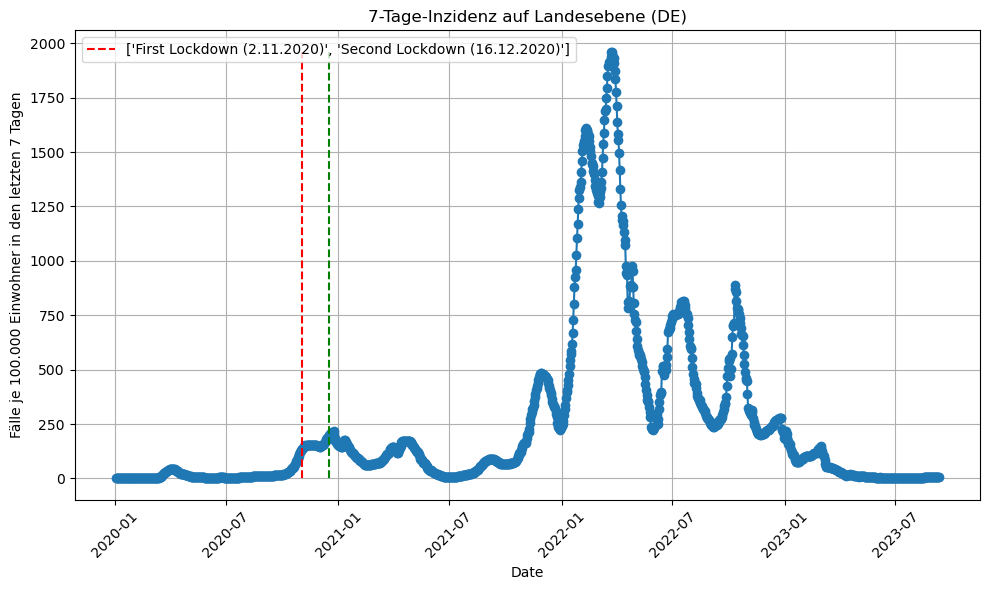

In [6]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen)')
plt.grid(True)
plt.xticks(rotation=45)

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
plt.vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
plt.grid(True)
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### II. Sentiment

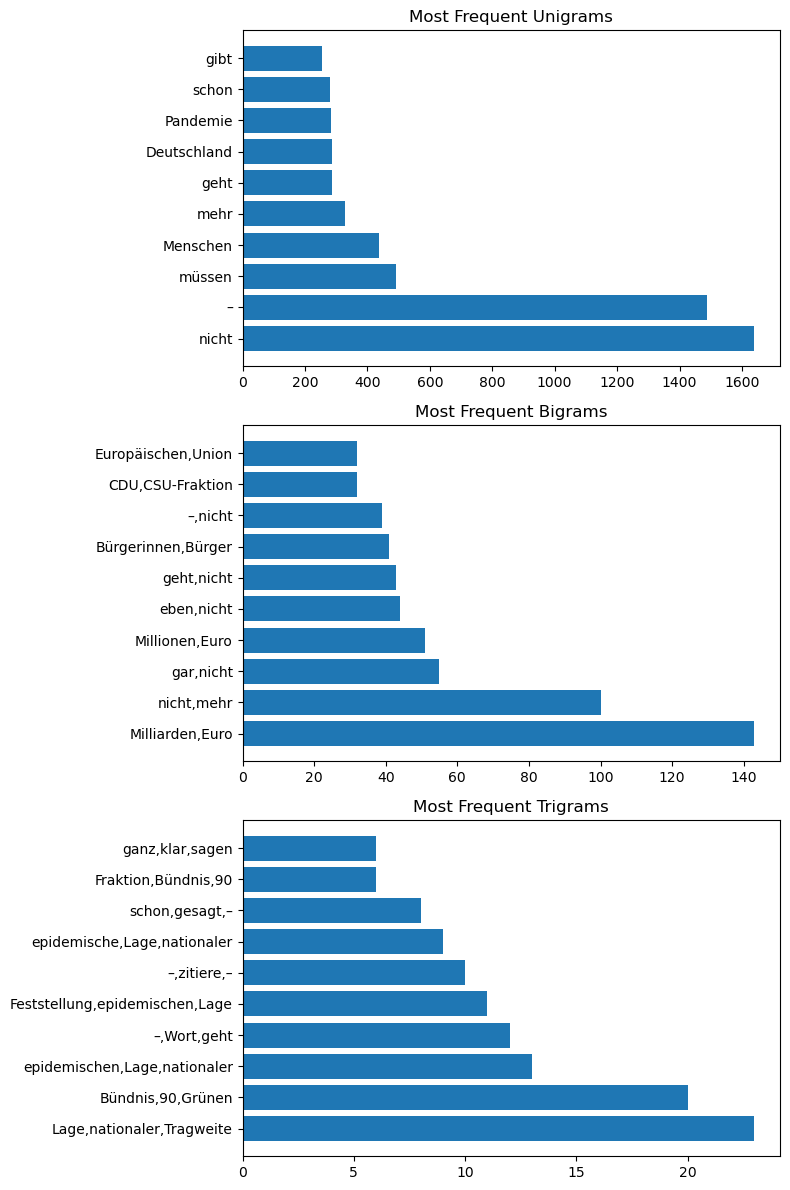

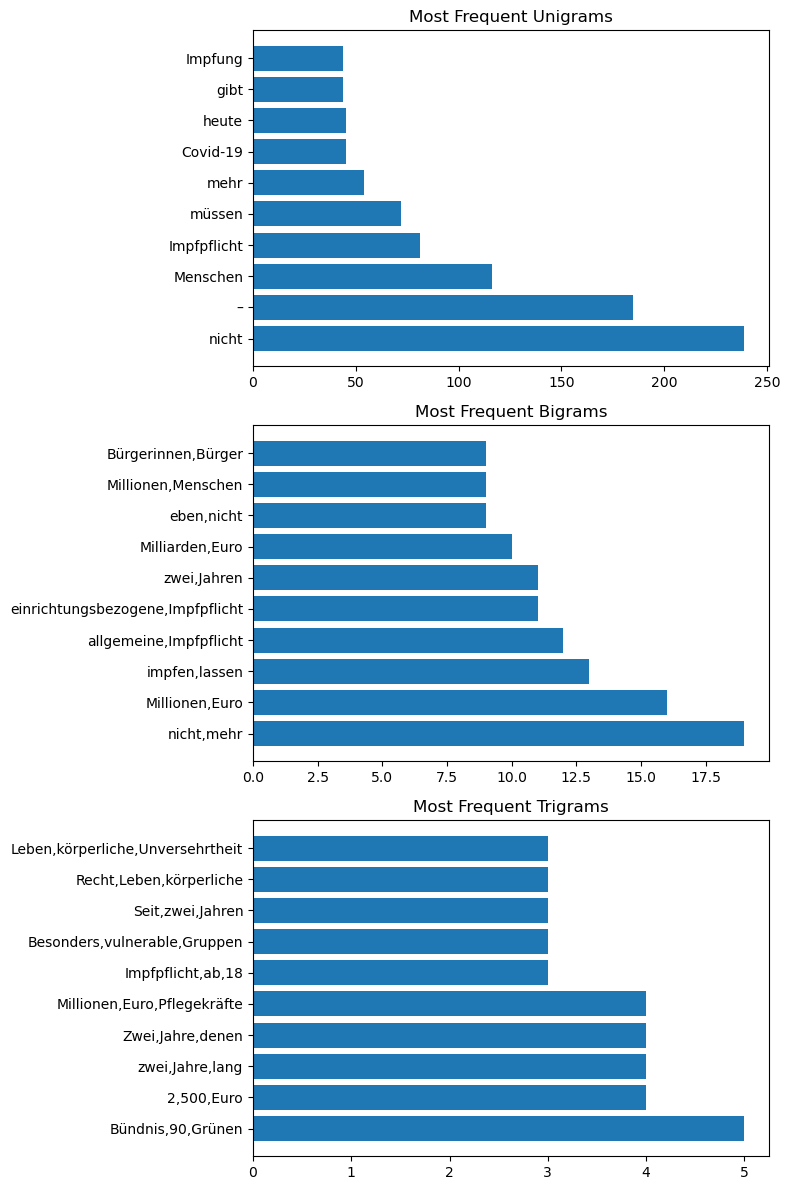

In [7]:
#Ausgabe der nGrams, um Stopwortliste zu überarbeiten
ngram_Stoppwortliste19 = Sentiment_Methods.plot_most_frequent_ngrams (df_sentiment19)
ngram_Stoppwortliste20 = Sentiment_Methods.plot_most_frequent_ngrams (df_sentiment20)

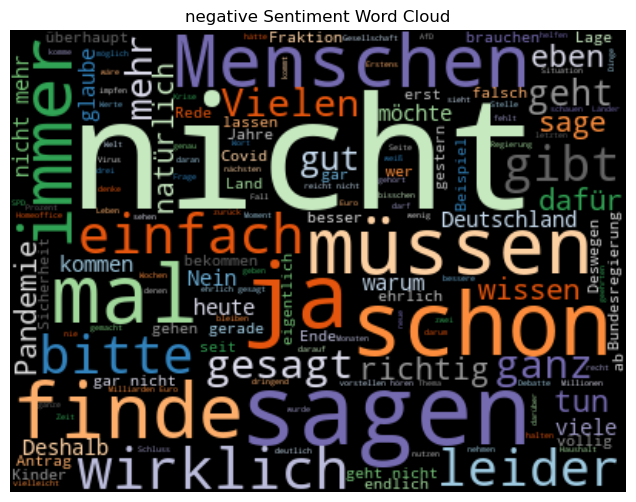

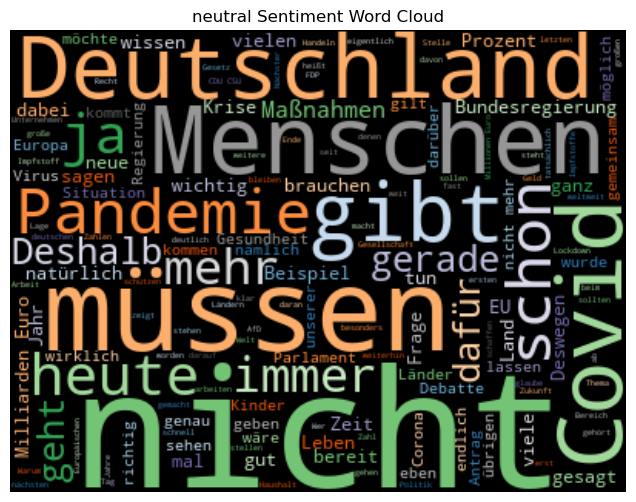

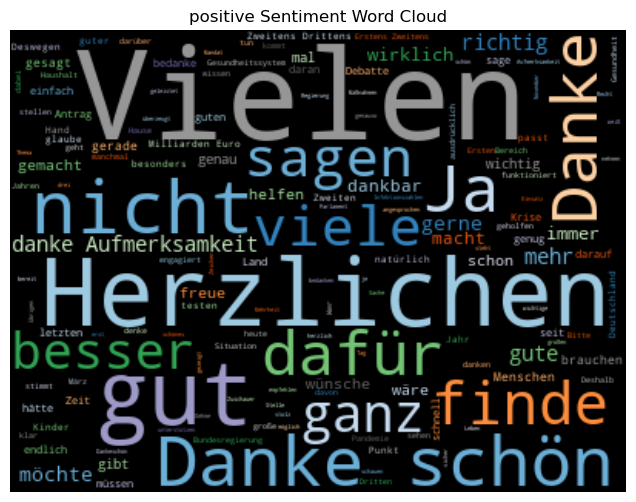

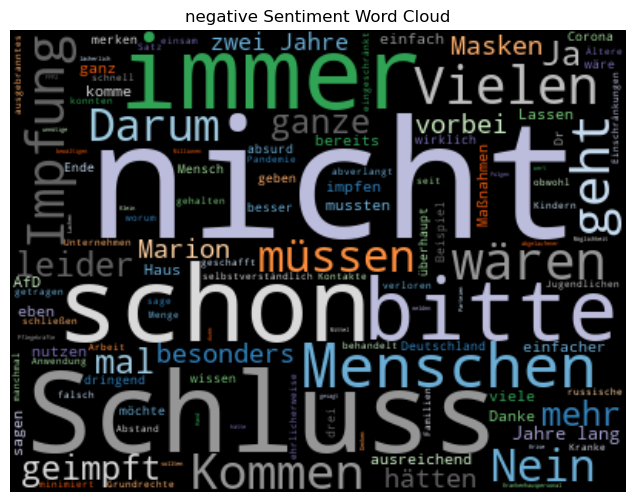

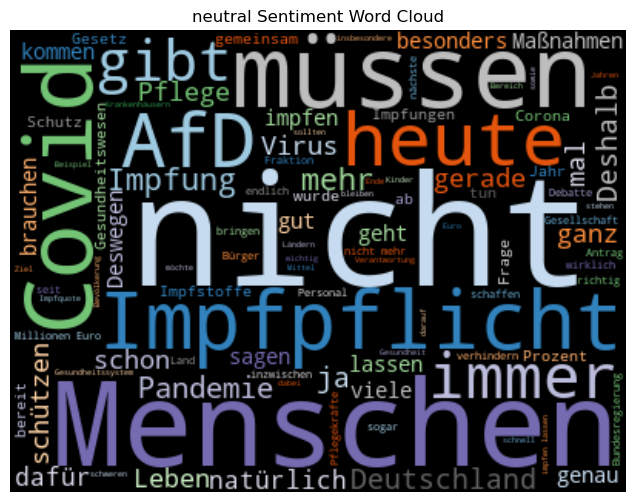

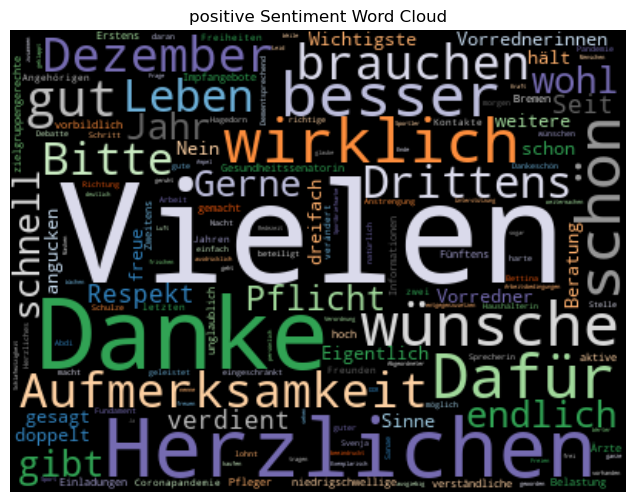

In [8]:
Sentiment_Methods.plot_sentiment_analysis(df_sentiment19, df_sentiment20)

Sentiment_Methods.plot_sentiment_wordclouds (df_sentiment19)
Sentiment_Methods.plot_sentiment_wordclouds (df_sentiment20)

In [9]:
# Plotten nach Parteizugehörigkeit durch Methodenaufrufe plot Sentiment by party
Sentiment_Methods.plot_sentiment_by_party(df_sentiment19)

Sentiment_Methods.plot_sentiment_by_party(df_sentiment20)

## 5. Vergleichende Analyse

In [10]:
# Um das Sentiment mit den Corona Fallzahlen zu vergleicehn nutzen wir einen merged Data Frame 

# Erstellen eines df, welches beide Wahlperioden kombiniert 

merged_df = pd.concat([df_sentiment19, df_sentiment20], ignore_index=True)


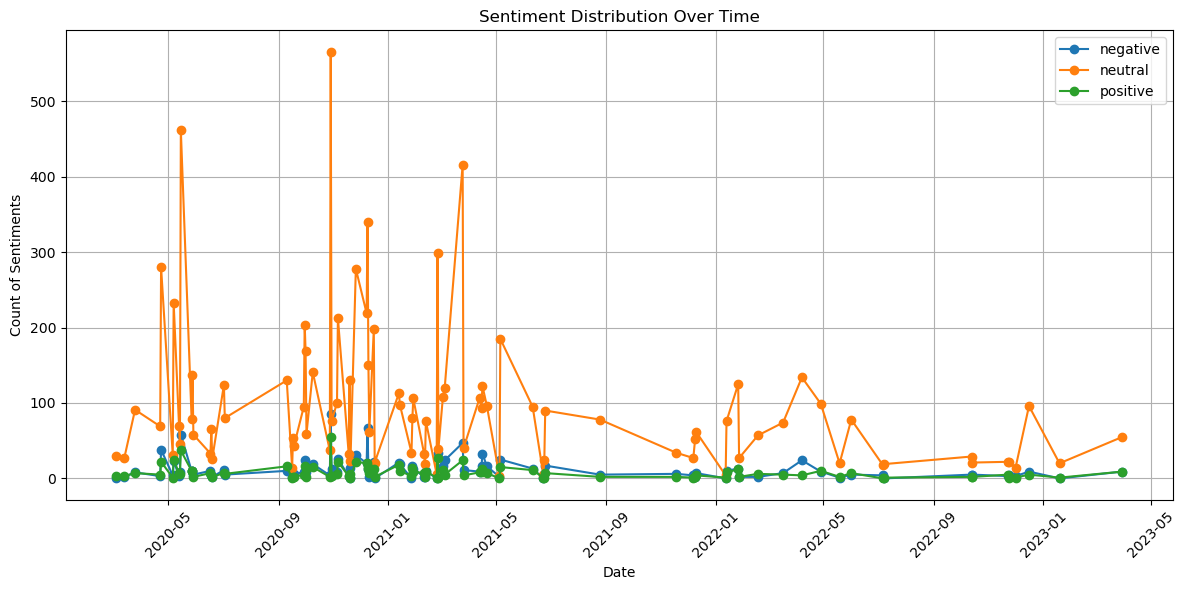

In [11]:
# Group the DataFrame by 'Date' and 'Sentiment' to count occurrences
sentiment_counts = merged_df.groupby(['date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each sentiment category for each day
for sentiment in sentiment_counts.columns:
    plt.plot(sentiment_counts.index, sentiment_counts[sentiment], marker='o', linestyle='-', label=sentiment)

# Customize the plot
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Sentiments')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


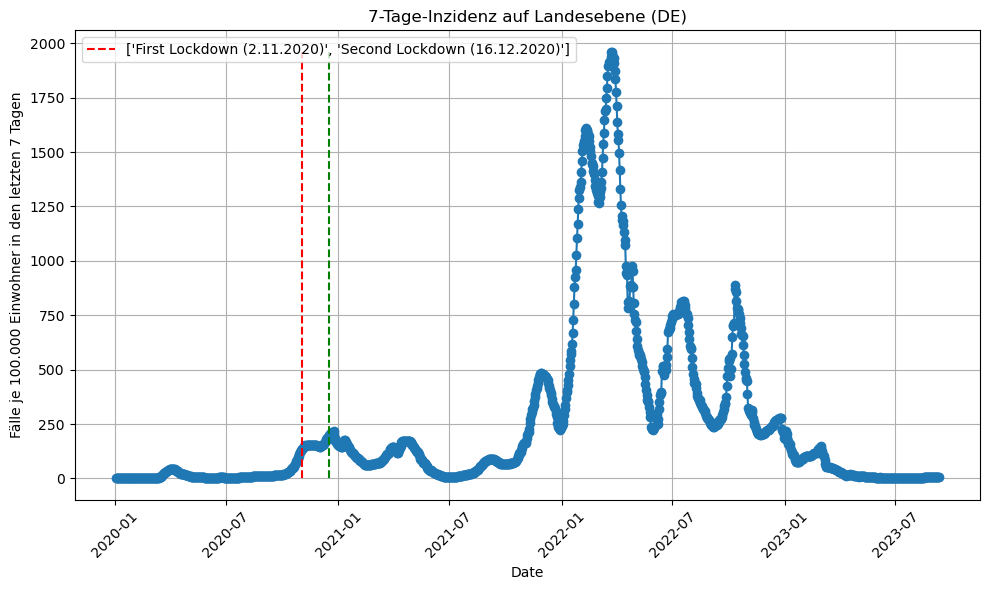

In [12]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen)')
plt.grid(True)
plt.xticks(rotation=45)

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
plt.vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
plt.grid(True)
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
start_date = max(merged_df['date'].min(), corona_fallzahlen_gesamt['date'].min())
end_date = min(merged_df['date'].max(), corona_fallzahlen_gesamt['date'].max())

# Filter both DataFrames to the overlapping date range
merged_df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]
corona_fallzahlen_gesamt = corona_fallzahlen_gesamt[
    (corona_fallzahlen_gesamt['date'] >= start_date) & (corona_fallzahlen_gesamt['date'] <= end_date)
]


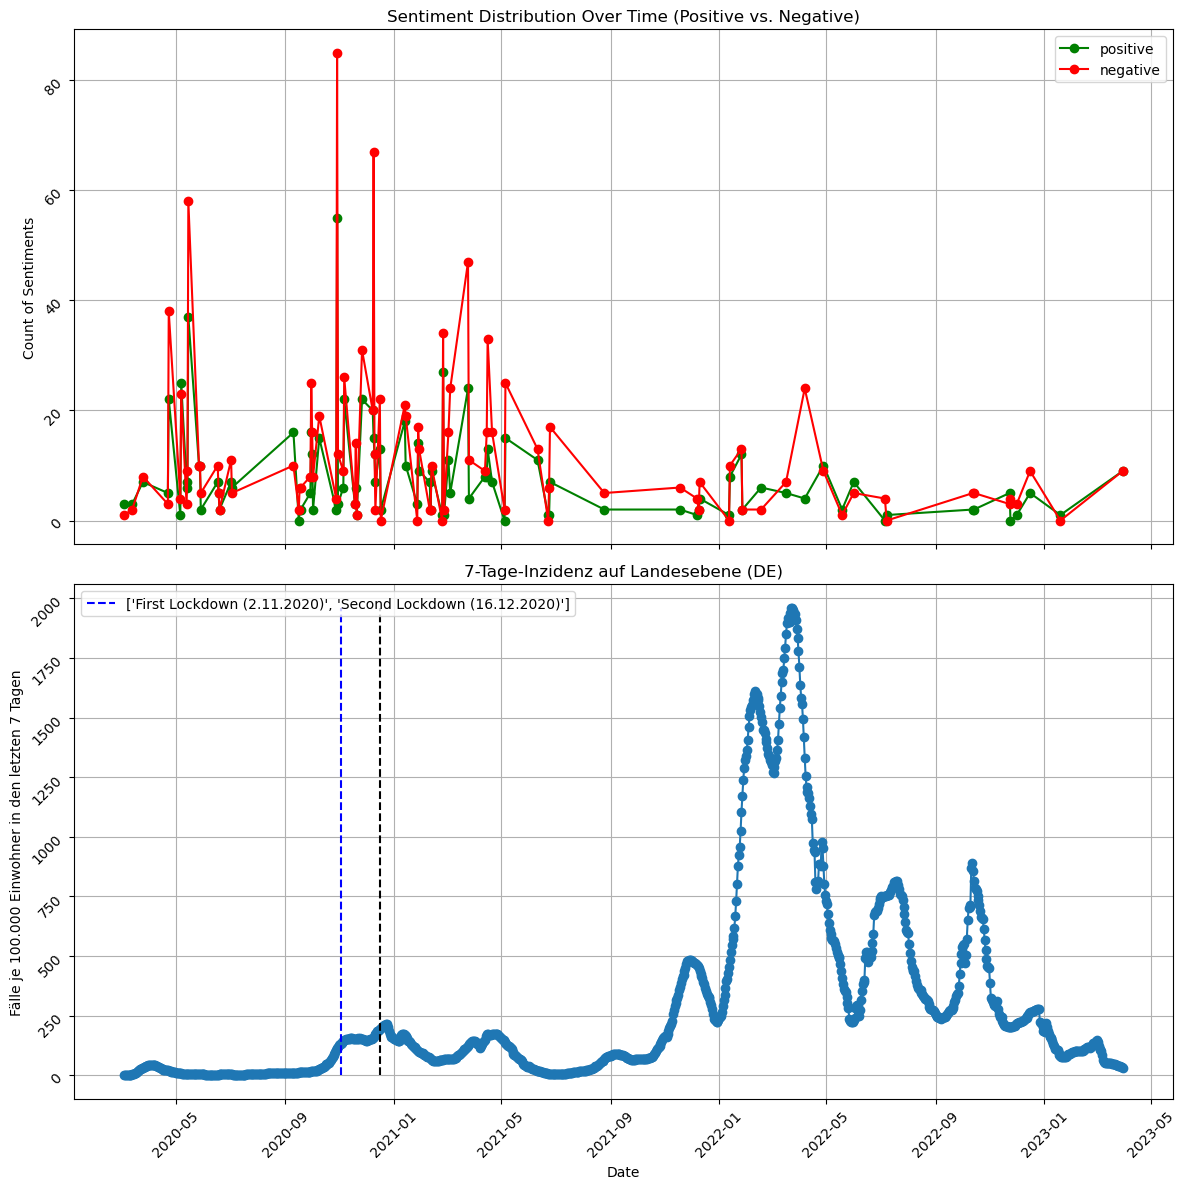

In [14]:
# Create a figure with two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot 1: Sentiment Distribution Over Time (Positive vs. Negative)
# Group the DataFrame by 'Date' and 'Sentiment' to count occurrences
sentiment_counts = merged_df.groupby(['date', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_counts_filtered = sentiment_counts[['positive', 'negative']]


# Define colors for the lines
colors = ['green', 'red']

# Plot each sentiment category for each day
for sentiment, color in zip(sentiment_counts_filtered.columns, colors):
    axs[0].plot(sentiment_counts_filtered.index, sentiment_counts_filtered[sentiment], marker='o', linestyle='-', label=sentiment, color=color)

# Customize the first plot
axs[0].set_title('Sentiment Distribution Over Time (Positive vs. Negative)')
axs[0].set_ylabel('Count of Sentiments')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Plot 2: 7-Tage-Inzidenz
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['blue', 'black'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the second plot
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)
axs[1].legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the combined plot
plt.show()

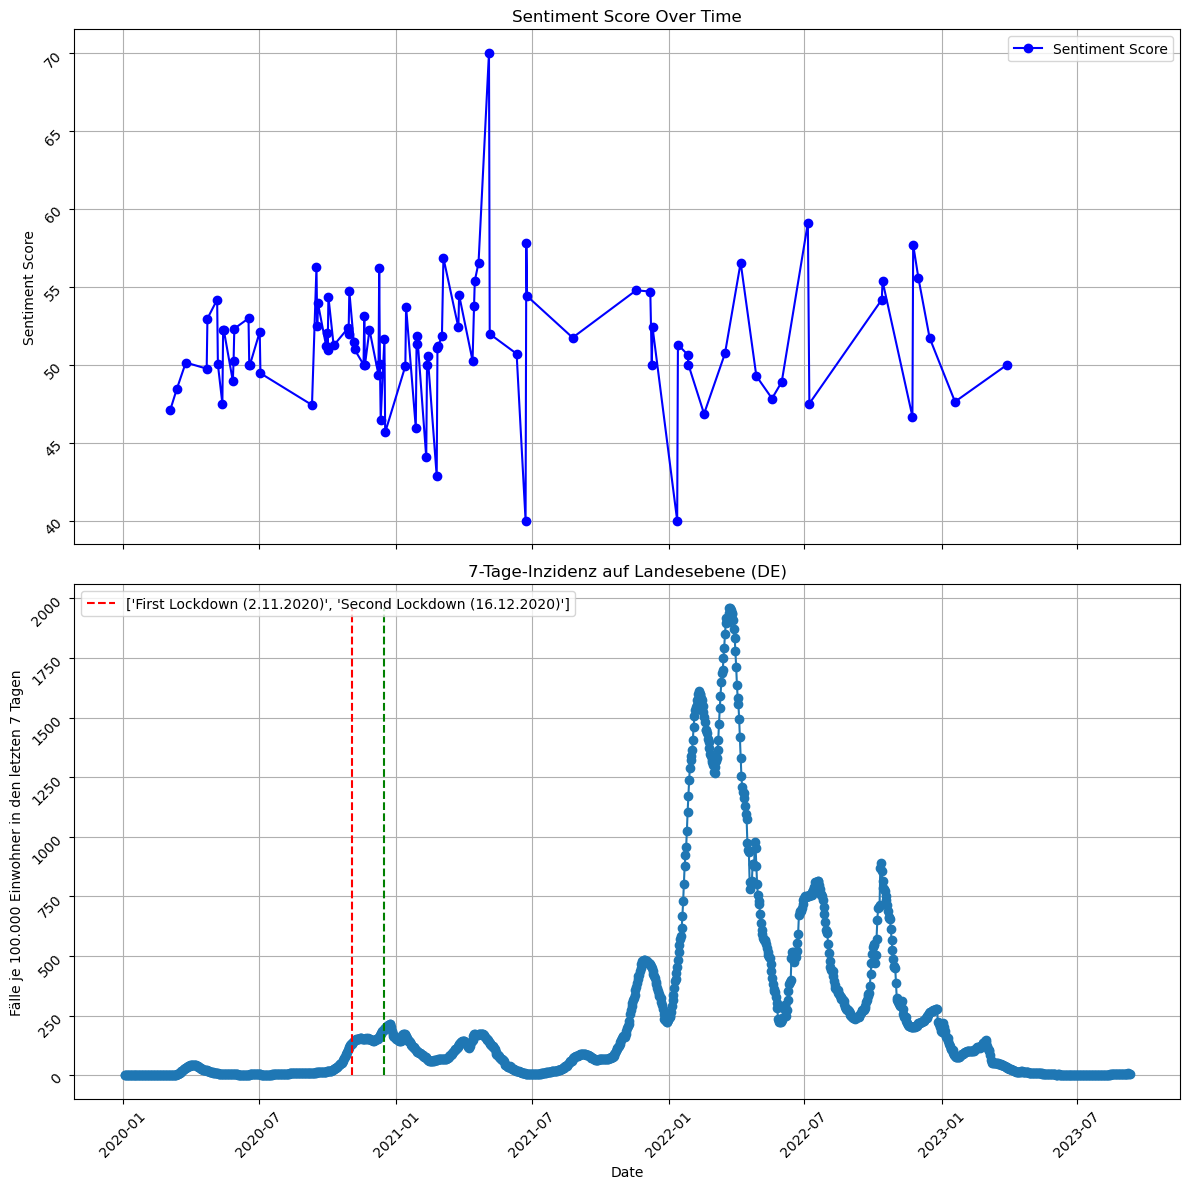

In [73]:
# Create a figure with two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot 1: Sentiment Distribution Over Time (Positive vs. Negative) using 'result_df'
# Group the DataFrame by 'date' and calculate the average sentiment score for each day
sentiment_scores = result_df.groupby('date')['Sentiment_Score'].mean()

# Plot the sentiment scores
axs[0].plot(sentiment_scores.index, sentiment_scores, marker='o', linestyle='-', label='Sentiment Score', color='blue')

# Customize the first plot
axs[0].set_title('Sentiment Score Over Time')
axs[0].set_ylabel('Sentiment Score')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Plot 2: 7-Tage-Inzidenz using 'corona_fallzahlen_gesamt'
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the second plot
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)
axs[1].legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the combined plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Create a figure with two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot 1: Sentiment Distribution Over Time (Positive vs. Negative) using 'result_df'
# Group the DataFrame by 'date' and calculate the average sentiment score for each day
sentiment_scores = result_df.groupby('date')['Sentiment_Score'].mean()

# Transform the sentiment scores to the desired range
transformed_sentiment_scores = 100 - (sentiment_scores * 100)

# Define a color map for parties
party_colors = {
    'CDU': 'blue',
    'SPD': 'red',
    'AfD': 'purple',
    'Grüne': 'green',
}

# Create a scatterplot for sentiment scores with colors based on party
for party, color in party_colors.items():
    party_data = result_df[result_df['party'] == party]
    axs[0].scatter(party_data['date'], 100 - (party_data['Sentiment_Score'] * 100),
                   label=party, color=color, alpha=0.7, marker='o')

# Customize the first plot
axs[0].set_title('Sentiment Score Over Time')
axs[0].set_ylabel('Sentiment (0 = Very Positive, 100 = Very Negative)')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Add y-axis labels for sentiment
axs[0].set_yticks([0, 25, 50, 75, 100])
axs[0].set_yticklabels(['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative'])

# Plot 2: 7-Tage-Inzidenz using 'corona_fallzahlen_gesamt'
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the second plot
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)
axs[1].legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the combined plot
plt.show()
